In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io

In [2]:
img_base_url = "https://yoyoyo-yo.github.io/Gasyori100knock/"

## Tutorial

### 画像処理の基本

PCやスマホ上で画像は数値の配列（行列）として存在している。

見た目はモノや風景に見えるが、その実態は数値が行と列とチャンネルの3方向に並んだ数値の集合だ。1マスをピクセル(pixel)や画素と呼ぶ。

画像の色の表現にはRGB(Red, Green, Blue)の3つの組み合わせが使われている。RGBは行と列とは別方向に並んだ軸であり、基本的にはRGBがチャンネル方向で表現される

この数値は 0から255の256の数値で大小が表現され、値が大きいほどその色味が強い。たとえば (R, G, B) = (255, 10, 100)であれば、赤味が最も強く、緑味が最も弱い色になる。RGBをそれぞれ0から255に変化させた色合いが下図となる。

画像処理は、ピクセルの値を操作する処理である。この時の操作とは、たとえば、隣り合っているピクセルの差分をとったりして、輪郭をとったりすることを示す。

### 画像の読み込み

In [3]:
img = cv2.imread("imori_256x256.png")

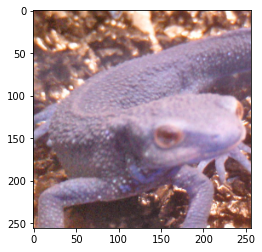

In [4]:
plt.imshow(img)

In [5]:
img

array([[[137,  81,  46],
        [115,  79,  43],
        [ 89,  50,  36],
        ...,
        [122,  84,  84],
        [145, 115, 120],
        [169, 144, 148]],

       [[134,  92,  69],
        [121,  83,  59],
        [ 92,  47,  43],
        ...,
        [136,  90,  79],
        [158, 113, 102],
        [177, 132, 119]],

       [[144,  94,  74],
        [138,  81,  60],
        [112,  56,  51],
        ...,
        [165, 111, 104],
        [163, 101,  90],
        [171, 104,  89]],

       ...,

       [[255, 214, 169],
        [240, 192, 134],
        [196, 132,  91],
        ...,
        [128,  63,  42],
        [116,  62,  37],
        [110,  63,  35]],

       [[241, 174, 119],
        [219, 149,  96],
        [198, 121,  89],
        ...,
        [129,  71,  52],
        [123,  69,  46],
        [120,  69,  43]],

       [[201, 137,  96],
        [200, 131, 114],
        [181, 114, 111],
        ...,
        [141,  80,  66],
        [135,  69,  51],
        [140,  71,  52]]

In [6]:
type(img)

numpy.ndarray

In [7]:
img.shape

(256, 256, 3)

In [8]:
img.dtype

dtype('uint8')

In [9]:
# RGB -> BGR
img = img[..., ::-1]

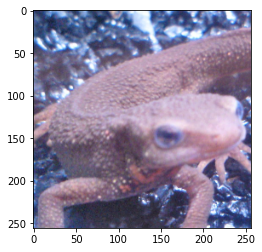

In [10]:
plt.imshow(img)

In [21]:
img = io.imread(img_base_url + "dataset/images/imori_256x256.png")

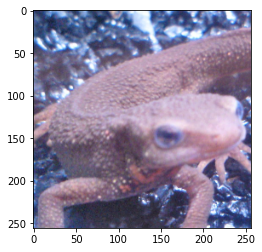

In [22]:
plt.imshow(img)

### 画像データの基礎知識

* データの中身は0 ~ 255の整数256段階
* 基本カラー画像はRGBの組み合わせで表現される

画像データの中身は0から255の256 $(= 2 ^ 8)$段階で、これは8ビットに由来する。値が大きいほど色が強く現れるということになる。

In [20]:
print("min =", img.min())
print("max =", img.max())

min = 5
max = 255


色はRGB (Red, Green, Blue)の３色を組み合わせて表現されている。この数はチャンネルと呼ばれる。それぞれ抜き出してみる。 ちなみにグレースケールと呼ばれる画像は、RGBに重みをつけて1チャンネルにしたものになるので、チャンネル数は1となる。

In [23]:
r = img[..., 0]
g = img[..., 1]
b = img[..., 2]

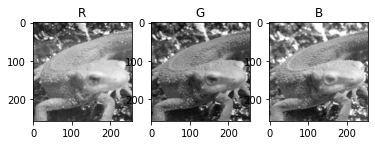

In [34]:
plt.subplot(1, 3, 1)
plt.title("R")
plt.imshow(r, cmap="gray")
plt.subplot(1, 3, 2)
plt.title("G")
plt.imshow(g, cmap="gray")
plt.subplot(1, 3, 3)
plt.title("B")
plt.imshow(b, cmap="gray")

### 画像のサイズ

shapeには（縦サイズ、横サイズ、チャンネルサイズ）が入っている

In [35]:
img.shape

(256, 256, 3)

### 画像のデータ型

型をとるには、img.dtypeを使用する。 uint8とは符号なしintで8ビットを意味します。画像はRGB成分がそれぞれ通常0から255の256段階で表現される。 例えば、赤のピクセルは(R,G,B) = (255, 0, 0)、白は(R,G,B) = (255, 255, 255)である。画像にする時は必ずこの型にしないと画像がおかしくなってしまう。

In [36]:
img.dtype

dtype('uint8')

例えば、imgの型をfloat32にしてみる。 これはastype()を使えばできる。

In [37]:
_img = img.astype(np.float32)
_img.dtype

dtype('float32')

ただし、float型は表示されない。

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


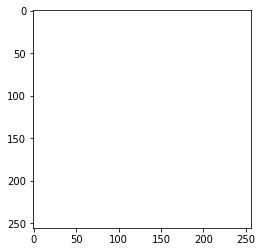

In [38]:
plt.imshow(_img)

ただし、float型の時は、$[0, 1]$の範囲の値になっていれば表示できる。なので、255で割ると表示できる。

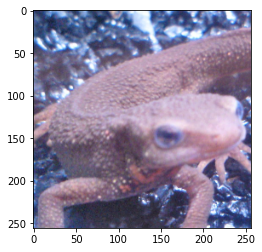

In [39]:
_img /= 255
plt.imshow(_img)

一般的に画像を操作する時は、以下の方法がおすすめ

1. cv2.imread, io.imreadで読み込む
2. 型を一度np.float32など小数点型に変換する
3. 画像をいじる
4. 画素が0未満のものは0, 255を超えたものは255に直す。（超重要）
5. 型をnp.uint8に変換して表示・保存する

### 画像のコピー

画像を別変数にコピーしたい時はcopy()を使いましょう。単純に img2 = img とすると、画像のアドレスが保存されるのでimg2をいじるとimgにも反映されてしまします。特別な利用がない場合は、copy()で画像をコピーしましょう。

In [40]:
img2 = img.copy()

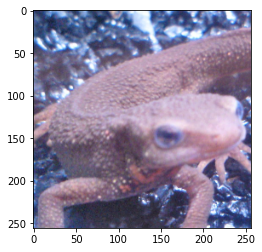

In [41]:
plt.imshow(img2)

### 画素をいじる

画像の操作法はnumpyとほとんど同じ。

例えば、x=30、y=20の画素値をいじりたい時は、こうする。 画素値はBGRの順に並んでいます。array()とはnumpy形式になっていることを意味する。つまり、opencv, sklearnはnumpyをラッパーしている。

In [55]:
img[20, 30]

array([121,  75,  58], dtype=uint8)

さらに、x=30、y=20、のG成分をとる時はこうする。

In [56]:
img[20, 30, 1]

75

ここから、numpyの本題になる。

numpyにはスライスという機能がある。 これはある値v1からある値v2までの全ての要素にアクセスできることを意味する。

例えば、y=20, x=[30, 32]までを見る時はこうする。 30:33とすれば行列のまま取り出せる。a:bとすることで、a<= v < bの値にアクセスできる。 ちなみに :30とすれば [0, 30]、30:とすれば[30, 最後]までを取り出せる。

In [12]:
img[20, 30:33]

array([[ 58,  75, 121],
       [ 43,  70, 113],
       [ 47,  72, 103]], dtype=uint8)

例えば画像の左上(x=[0, 50], y = [0, 50])を黒にするには、こんな感じでできる。

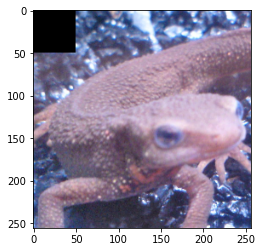

In [29]:
img2 = img.copy()
img2[:50, :50] = 0
plt.imshow(img2)

次に先程の　4. 画素が0未満のものは0, 255を超えたものは255に直す。　に関して説明します。

例えば、画像を一度 float32型にして、一部分のB成分を260という値に変えてみます。 uint8型は[0, 255] の範囲しか取り得ないので、これをuint8型に直すとこんな風になります。 イモリの顔の一部分が黄色くなってしまっています。

これは、260をuint8型に直すと260 - 256 が起きて、B=4となってしまうためです。 これが原因で画素値がおかしくなることが多々起きてしまいます。 なので、4の操作が必要となります。

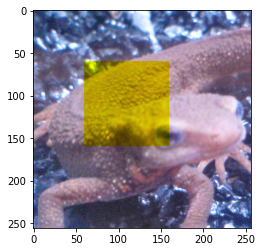

In [33]:
img2 = img.copy().astype(np.float32)
img2[60:160, 60:160, 2] = 260
img2 = img2.astype(np.uint8)
plt.imshow(img2)

In [15]:
img2[60, 60, 2]

4

### 画像の保存

画像の保存にはcv2.imwrite()または、plt.savefig()などを使う。

In [26]:
cv2.imwrite('sample.png', img2)

True

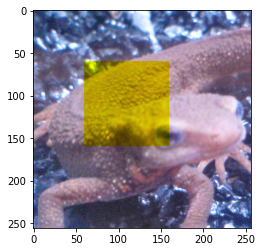

In [34]:
plt.imshow(img2)
plt.savefig('sample.png')

### 練習

画像の上左半分のRとBを入れ替えて表示してみましょう。

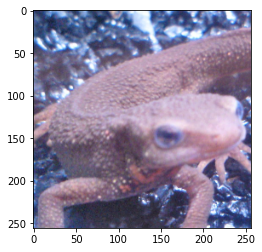

In [36]:
plt.imshow(img)

In [37]:
img2 = img.copy()

In [39]:
img2[0:img.shape[0] // 2, 0:img.shape[1] // 2, 0] = img[0:img.shape[0] // 2, 0:img.shape[1] // 2, 2]

In [42]:
img2[0:img.shape[0] // 2, 0:img.shape[1] // 2, 2] = img[0:img.shape[0] // 2, 0:img.shape[1] // 2, 0]

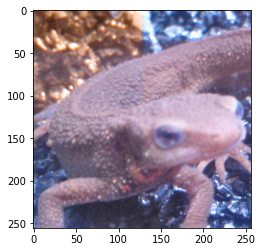

In [43]:
plt.imshow(img2)